# Loading your data

To load your data successfully, you will need to look up the path name - the file directory path on your computer that 
describes the location of the file containing the data.
note that this file must also be in a format that is readable by R (e.g. text, csv)

In [1]:
#You can use getwd to determine what Jupyter notebooks is using as the current path name
getwd()

'/home/user/Jen-Scratch'

In [2]:
#You can use setwd to set the path name appropriately - note that the pathname should have forward slashes
setwd("/home/user/Jen-Scratch")

In [5]:
#Once you have set the path, use an R read function to load the data and assigning it to a data frame object.


#You will need to set the arguments to the function correctly - for example does your file have a header row, what is the separator, etc.

#the first argument should be the name of the file that contains the data

df <- read.csv("test3.txt", header=F, sep="|", stringsAsFactors=FALSE)

V1,V2,V3,V4,V5,V6,V7,V8,V9
Luís,Gonçalves,SP,Brazil,Sci Fi & Fantasy,Experiment In Terra,2010-03-11 00:00:00,1.99,2923548
Luís,Gonçalves,SP,Brazil,Sci Fi & Fantasy,Take the Celestra,2010-03-11 00:00:00,1.99,2927677
Luís,Gonçalves,SP,Brazil,Rock,Shout It Out Loud,2010-06-13 00:00:00,0.99,219742
Luís,Gonçalves,SP,Brazil,Rock,Calling Dr. Love,2010-06-13 00:00:00,0.99,225332
Luís,Gonçalves,SP,Brazil,Rock,Strutter,2010-06-13 00:00:00,0.99,192496
Luís,Gonçalves,SP,Brazil,Rock,Cold Gin,2010-06-13 00:00:00,0.99,262243


# Preparing your data

To prepare your data for number crunching (basic analytics) and analysis, you will need to review it to confirm that it is well labelled, well structured, that missing values have been dealt with appropriately and that the data is clean.

In [6]:
#Always make a 'back up' version of your dataset when you make changes, so it's easy to go back
#If your dataset is fairly small you can do this simply by copying the dataset into a new variable.

#df_original keeps the original version of the dataset intact. If need be you can start again with df_original.
df_original <- df

#Do this as often as you need to while working with the dataset

V1,V2,V3,V4,V5,V6,V7,V8,V9
Luís,Gonçalves,SP,Brazil,Sci Fi & Fantasy,Experiment In Terra,2010-03-11 00:00:00,1.99,2923548
Luís,Gonçalves,SP,Brazil,Sci Fi & Fantasy,Take the Celestra,2010-03-11 00:00:00,1.99,2927677
Luís,Gonçalves,SP,Brazil,Rock,Shout It Out Loud,2010-06-13 00:00:00,0.99,219742
Luís,Gonçalves,SP,Brazil,Rock,Calling Dr. Love,2010-06-13 00:00:00,0.99,225332
Luís,Gonçalves,SP,Brazil,Rock,Strutter,2010-06-13 00:00:00,0.99,192496
Luís,Gonçalves,SP,Brazil,Rock,Cold Gin,2010-06-13 00:00:00,0.99,262243


In [7]:
#Labelling the data for ease of use

#if your data file doesn't have a header line, R will assign generic labels to the columns of the data frame. You can add (or change) the column labels of the data frame by accessing the names list associated with the data frame and assigning new column labels

names(df) <- c("fname","lname","province","country","genre","track","purchasedate","cost","duration")

In [8]:
#Make sure the data has been assigned the correct data types (strings, numbers, factors, dates)

#Dealing with date data type can be tricky. Dates will likely have been read in as strings. 

#R has several date object options, so that you can treat your values as dates, and perform operations on them as dates.

#Here the purchasedate column is converted from a string to a date data type. Note that as.POSIX is operating on each value in the chosen column and then returning a new column, which we then assign back to the data frame so that it replaces the existing column

df$purchasedate <-  as.POSIXlt(df$purchasedate)

In [9]:
#for convenience of analysis, you can break out the different parts (e.g. year, month) of the date, and store them
#in new, separate columns

df$year <- df$purchasedate$year+1900
df$month <- df$purchasedate$mon+1

In [12]:
#Subsetting the data

#You may only be interested in a certain subset of the data - for example data from one country.

#If you have a large dataset, it can be difficult to analyze or visualize the entire dataset at once.
#Similarly, it may be that the range of data values in a single column across the entire dataset is too large to 
# allow for useful visualization. 

df_subset <- df[df$country=="Brazil"&df$genre=="Rock",c('cost','duration')]


# Working with the data: number crunching and analyzing

In [13]:
#The table command is an easy way to generate contingency tables
table(df$country)
table(df$country,df$genre)


     Argentina      Australia        Austria        Belgium         Brazil 
            38             38             38             38            190 
        Canada          Chile Czech Republic        Denmark        Finland 
           304             38             76             38             38 
        France        Germany        Hungary          India        Ireland 
           190            152             38             74             38 
         Italy    Netherlands         Norway         Poland       Portugal 
            38             38             38             38             76 
         Spain         Sweden United Kingdom            USA 
            38             38            114            494 

                
                 Alternative Alternative & Punk Blues Bossa Nova Classical
  Argentina                0                  9     0          0         0
  Australia                0                  0     1          0         0
  Austria                  0                  0     0          0         2
  Belgium                  0                 14     0          0         0
  Brazil                   0                  7     6          0         6
  Canada                   0                 36     4          7         5
  Chile                    0                  2     2          0         1
  Czech Republic           0                  9     1          0         0
  Denmark                  0                  4     0          0         0
  Finland                  0                  2     0          0         0
  France                   4                 31     2          1        10
  Germany                  1                 13    14          0         0
  Hungar

In [14]:
#you can create contingency tables on a subset of the dataset, as well
brazildf <- df[df$country=="Brazil",]
table(brazildf$province,brazildf$genre)

    
     Alternative & Punk Blues Classical Hip Hop/Rap Latin Metal Pop R&B/Soul
  DF                  0     6         4           0     8     6   1        2
  RJ                  2     0         0           0    16     2   0        0
  SP                  5     0         2           2    29     7   2        1
    
     Reggae Rock Sci Fi & Fantasy Soundtrack World
  DF      0   11                0          0     0
  RJ      0   16                0          0     2
  SP      6   54                2          4     0

In [15]:
#some useful variations on contingency tables
addmargins(table(brazildf$province,brazildf$genre))
prop.table(table(brazildf$province,brazildf$genre))
round(prop.table(table(brazildf$province,brazildf$genre)),digits=2)

,Alternative & Punk,Blues,Classical,Hip Hop/Rap,Latin,Metal,Pop,R&B/Soul,Reggae,Rock,Sci Fi & Fantasy,Soundtrack,World,Sum
DF,0,6,4,0,8,6,1,2,0,11,0,0,0,38
RJ,2,0,0,0,16,2,0,0,0,16,0,0,2,38
SP,5,0,2,2,29,7,2,1,6,54,2,4,0,114
Sum,7,6,6,2,53,15,3,3,6,81,2,4,2,190


    
     Alternative & Punk       Blues   Classical Hip Hop/Rap       Latin
  DF        0.000000000 0.031578947 0.021052632 0.000000000 0.042105263
  RJ        0.010526316 0.000000000 0.000000000 0.000000000 0.084210526
  SP        0.026315789 0.000000000 0.010526316 0.010526316 0.152631579
    
           Metal         Pop    R&B/Soul      Reggae        Rock
  DF 0.031578947 0.005263158 0.010526316 0.000000000 0.057894737
  RJ 0.010526316 0.000000000 0.000000000 0.000000000 0.084210526
  SP 0.036842105 0.010526316 0.005263158 0.031578947 0.284210526
    
     Sci Fi & Fantasy  Soundtrack       World
  DF      0.000000000 0.000000000 0.000000000
  RJ      0.000000000 0.000000000 0.010526316
  SP      0.010526316 0.021052632 0.000000000

    
     Alternative & Punk Blues Classical Hip Hop/Rap Latin Metal  Pop R&B/Soul
  DF               0.00  0.03      0.02        0.00  0.04  0.03 0.01     0.01
  RJ               0.01  0.00      0.00        0.00  0.08  0.01 0.00     0.00
  SP               0.03  0.00      0.01        0.01  0.15  0.04 0.01     0.01
    
     Reggae Rock Sci Fi & Fantasy Soundtrack World
  DF   0.00 0.06             0.00       0.00  0.00
  RJ   0.00 0.08             0.00       0.00  0.01
  SP   0.03 0.28             0.01       0.02  0.00

In [17]:
#sometimes it's useful to transform the data and create a new data frame, rather than a table
#this is because some functions for analyzing data operate on data frame objects, not table objects

#as well, instead of using a count function, as with contingency tables, we might want to apply a different function.

#here the dcast function generates a new data frame. The data frame in this case isn't assigned to a new variable.

library(reshape2)
dcast(brazildf, province~genre, value.var='cost', mean)

province,Alternative & Punk,Blues,Classical,Hip Hop/Rap,Latin,Metal,Pop,R&B/Soul,Reggae,Rock,Sci Fi & Fantasy,Soundtrack,World
DF,NaN,0.99,0.99,NaN,0.99,0.99,0.99,0.99,NaN,0.99,NaN,NaN,NaN
RJ,0.99,NaN,NaN,NaN,0.99,0.99,NaN,NaN,NaN,0.99,NaN,NaN,0.99
SP,0.99,NaN,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,1.99,0.99,NaN


In [23]:
#we can roll up the data using the value of categorical variables - applying a function - in this case the aggregate function - to the values associated with each variable

revenue_data <- aggregate(cost ~ genre, data=df, mean)
revenue_data <- aggregate(cost ~ genre + country, data=df, mean)

In [24]:
#We can also transform this newly aggregated data into a different shape again using the dcast function
dcast(revenue_data, country~genre, value.var='cost', mean)

country,Alternative,Alternative & Punk,Blues,Bossa Nova,Classical,Comedy,Drama,Easy Listening,Electronica/Dance,⋯,Pop,R&B/Soul,Reggae,Rock,Rock And Roll,Sci Fi & Fantasy,Science Fiction,Soundtrack,TV Shows,World
Argentina,NaN,0.99,NaN,NaN,NaN,NaN,NaN,0.99,NaN,⋯,NaN,NaN,NaN,0.99,NaN,NaN,NaN,0.99,NaN,NaN
Australia,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,0.99,0.99,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,NaN,NaN,0.99,NaN,1.99,NaN,NaN,⋯,0.99,0.99,NaN,0.99,NaN,NaN,NaN,NaN,1.99,NaN
Belgium,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,0.99,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,0.99,0.99,NaN,0.99,NaN,NaN,NaN,NaN,⋯,0.99,0.99,0.99,0.99,NaN,1.99,NaN,0.99,NaN,0.99
Canada,NaN,0.99,0.99,0.99,0.99,NaN,1.99,NaN,0.99,⋯,NaN,0.99,0.99,0.99,0.99,NaN,NaN,NaN,1.99,0.99
Chile,NaN,0.99,0.99,NaN,0.99,NaN,1.99,0.99,NaN,⋯,NaN,NaN,NaN,0.99,NaN,1.99,1.99,0.99,1.99,NaN
Czech Republic,NaN,0.99,0.99,NaN,NaN,NaN,1.99,NaN,0.99,⋯,0.99,0.99,NaN,0.99,NaN,NaN,1.99,NaN,1.99,NaN
Denmark,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,0.99,NaN,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN
Finland,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,NaN,NaN,0.99,0.99,NaN,1.99,NaN,NaN,NaN,NaN


# Visualizing your data

## Barcharts

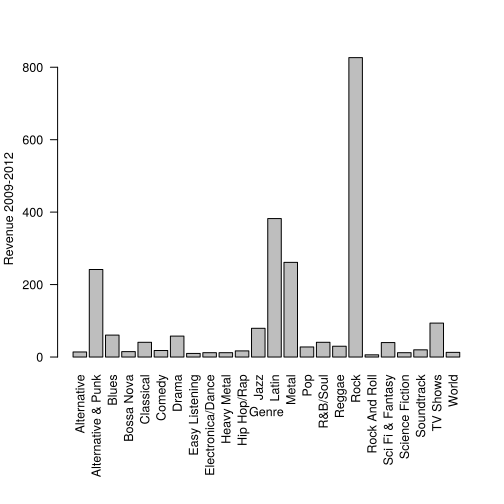

In [26]:
#simple barchart

revenue_data <- aggregate(cost ~ genre, data=df, sum)
par(mar=c(10,4,4,2))
barplot(revenue_data$cost,names.arg=revenue_data$genre, xlab="Genre", ylab="Revenue 2009-2012",las=2)

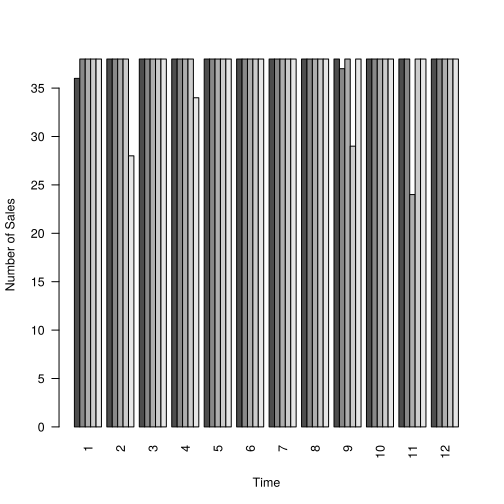

In [27]:
#barchart with two categorical variables

salespermonth<-table(df$year,df$month)
barplot(salespermonth, xlab="Time", ylab="Number of Sales",las=2, beside=TRUE,legend = rownames(salespermonth),args.legend = list(x ='topright', bty='n', inset=c(-0.25,0)))

## Scatterplots

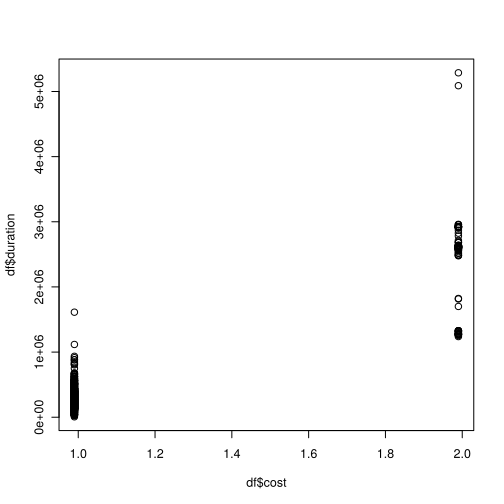

In [29]:
plot(df$cost,df$duration)

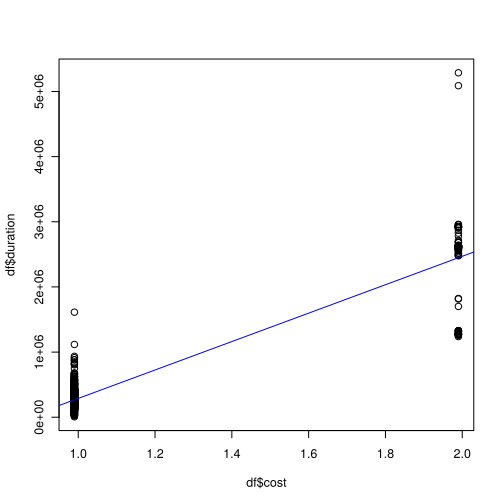

In [32]:
#create a linear model fitted to the data
library(stats)
mymodel<-lm(df$duration ~ df$cost, data = df)

#then plot the data and the linear model (in blue)
plot(df$cost,df$duration)
abline(mymodel, col="blue")

## Line graphs

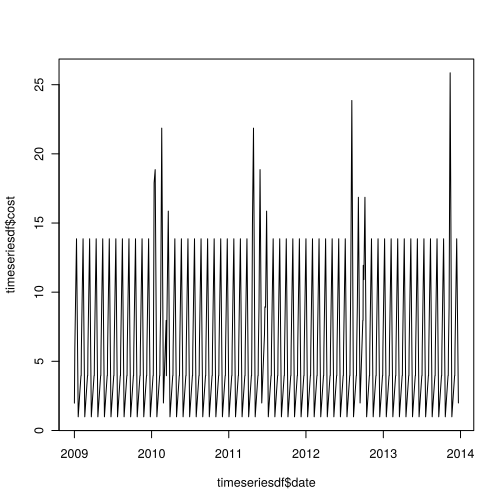

In [33]:
#create a new data frame that sums revenues for each transaction date
#for this to work, we  need to treat the data as a character string
timeseriesdf <- aggregate(cost ~ as.character(purchasedate), data=df, sum)

#rename the columns to be something more suitable than the name R assigns by default
colnames(timeseriesdf)[1]<-"stringdate"

#now turn the dates back into  real data objects
timeseriesdf$stringdate<-as.POSIXlt(timeseriesdf$stringdate)

#and fix the column name to reflect this
colnames(timeseriesdf)[1]<-"date"

#and finally, plot the time series, showing revenue per transaction date
#note - we can really tell from this result that this is an artificially created dataset
plot(timeseriesdf$date,timeseriesdf$cost,type="l")

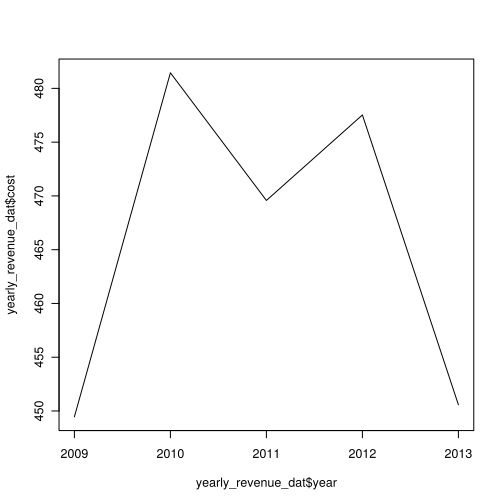

In [35]:
#create a line graph that looks at the sales revenue for each year
#again, some issues here - presumably we don't have full data for 2009 and 2013, and again, the data set is artificial
yearly_revenue_dat <- aggregate(cost ~ year, data=df, sum)
plot(yearly_revenue_dat$year,yearly_revenue_dat$cost,type="l")

year,month,cost
2009,1,35.64
2010,1,52.62
2011,1,37.62
2012,1,37.62
2013,1,37.62
2009,2,37.62


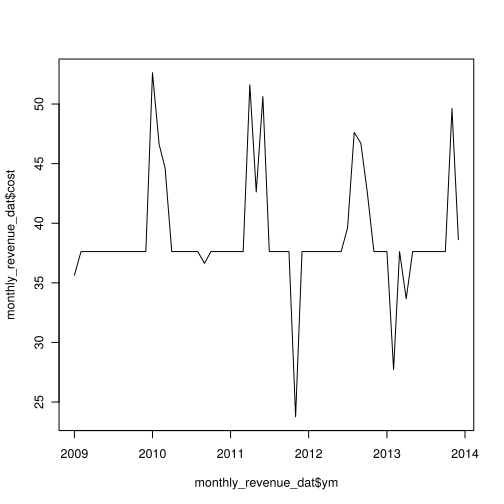

In [39]:
#get a cost breakdown by both year and month, using the year and month columns that were created during data preparation
monthly_revenue_dat <- aggregate(cost ~ year+month, data=df, sum)
head(monthly_revenue_dat)

#create a new column that combines the year and month values
monthly_revenue_dat$ym <- do.call(paste, c(monthly_revenue_dat[c("year", "month")], sep = "-"))

#convert the values in this new column from string to date objects
monthly_revenue_dat$ym <- as.POSIXlt(paste(monthly_revenue_dat$ym,"-1",sep=""))

#sort the values by date and plot the results
monthly_revenue_dat <- monthly_revenue_dat[order(monthly_revenue_dat$ym), ]
plot(monthly_revenue_dat$ym,monthly_revenue_dat$cost,type="l")